# Prosper Loan Data Exploration
## by Joseph Stanley

## Introduction
 
This data set contains 113,937 loan listings by a loan company Prosper with 81 variables on each loan which are uniquely identified by a listing Key and are stored on Udacity's server.  
These loan variables include:
* The loan amount.
* The borrower's APR (Total annual Percentage rate).
* The status of the loan.
* The borrower"s stated monthy income and many others available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

%matplotlib inline

### Assessment

In [2]:
#loading the dataset
loan_data_original= pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
loan_data_original.shape

(113937, 81)

In [4]:
#dataset info
loan_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
#dataset head
loan_data_original.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
loan_data_original.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
loan_data_original.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Cleaning

create a copy before cleaning

In [8]:
loan_data=loan_data_original.copy()

**Issue 1. Improper column data types**

#### Define: Convert the data type of column ListingCreationDate, ClosedDate, LoanOriginationDate, DateCreditPulled  to datetime

Code

In [9]:
loan_data = loan_data.astype({'ListingCreationDate': 'datetime64[ns]', 
                            'ClosedDate': 'datetime64[ns]',
                            'LoanOriginationDate':"datetime64[ns]",
                            'DateCreditPulled':'datetime64[ns]',
                             'StatedMonthlyIncome': "int"})


Test

In [10]:
loan_data.dtypes

ListingKey                                     object
ListingNumber                                   int64
ListingCreationDate                    datetime64[ns]
CreditGrade                                    object
Term                                            int64
LoanStatus                                     object
ClosedDate                             datetime64[ns]
BorrowerAPR                                   float64
BorrowerRate                                  float64
LenderYield                                   float64
EstimatedEffectiveYield                       float64
EstimatedLoss                                 float64
EstimatedReturn                               float64
ProsperRating (numeric)                       float64
ProsperRating (Alpha)                          object
ProsperScore                                  float64
ListingCategory (numeric)                       int64
BorrowerState                                  object
Occupation                  

**Issues 2. Feature engineering a new mean credit score variable**

#### Define: the average of the borrower's CreditScoreRangeLower and the CreditScoreRangeUpper would be calculated and stored in a avgcredit score variable

Code

In [11]:
loan_data['AvgCreditScore'] = (loan_data['CreditScoreRangeLower'] + loan_data['CreditScoreRangeLower'])/2


Test

In [12]:
loan_data.AvgCreditScore.head()

0    640.0
1    680.0
2    480.0
3    800.0
4    680.0
Name: AvgCreditScore, dtype: float64

**Issue 3. replace numeric listing categories with alphabetical listing categories**

#### Define: Replace all numeric column values(1-20) with their corresponding alphabetical denotations.

code

In [13]:

loan_data['ListingCategory (numeric)'].replace( to_replace= {0 : 'Not Available', 1 :'Debt Consolidation' , 2 :'Home Improvement',3 : 'Business',
                                4 : 'Personal Loan',5 : 'Student Use',6 :'Auto', 7 : 'Other', 8 :'Baby&Adoption',
                                9: 'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring',12 :'Green Loans',
                                13 :'Household Expenses',14: 'Large Purchases', 15 : 'Medical/Dental',
                                16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'},
                                           inplace= True)


Test

In [14]:
loan_data['ListingCategory (numeric)'].head()

0       Not Available
1    Home Improvement
2       Not Available
3          Motorcycle
4    Home Improvement
Name: ListingCategory (numeric), dtype: object

In [15]:
#descriptive statistics for numeric variables.
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,AvgCreditScore
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113346.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228,685.567731
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020,66.458275
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,660.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000,680.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000,720.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000,880.000000


### What is the structure of the dataset?

This data set contains 113,937 loans with 81 variables on each loan which is uniquely identified by a listing key.

#### The main features of interest to be considered would be guided by the following research questions;

How were the other loan variables related to borrower’s APR or overall interest rate?

What was the nature of the Company's Estimated Percentage returns on their loan listings and  how was it related to other variables especially the risk Factors?

Are there significant peculiarities in loan variables like the  Loan Term, Estimated return, Borrower's APR, the Borrowers risk factors(ProsperRating and ProsperScore, Stated monthly income and loan category(reason) across various loan amounts? 


#### The features in the dataset that will help support investigation into the features of interest are;
* It is expected that the loan term(loan Tenure), loan amount  and the borrower's risk variables would influence the APR or overal interest rate to a very significant extent

* It is also expected that the company's estimated returns on each loan would be largely dependent on the borrowers risk profile and the specific amount of the loan itself.

* It is also expected that income range, debt to income ratio, stated monthly income,Average credit score, prosper score, credit balance, income range, prior deliquencies should show significant disparities in large and meagre amount loans.

## Univariate Exploration

Exploration of the employment status column

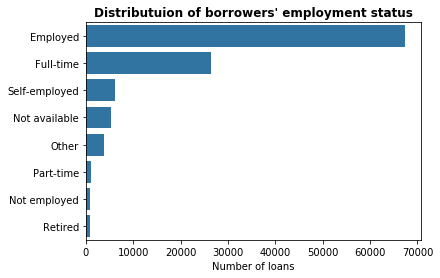

In [16]:
base_color = sns.color_palette()[0]   
freq = loan_data['EmploymentStatus'].value_counts()
gen_order = freq.index
sns.countplot(data= loan_data, y='EmploymentStatus', color=base_color, order=gen_order);
sns.set(rc = {'figure.figsize':(10,5)}) 
plt.title("Distributuion of borrowers' employment status",fontweight="bold")
plt.ylabel('')
plt.xlabel('Number of loans')
#Display the plot
plt.show()

>The count plot shows that a huge portion of the loans were taken by individuals who were just employed or employed full time or part-time. A very tiny portion of the loans were taken by unemployed and retired persons.

exploring the Borrower's  occupation status

In [17]:
#value counts
loan_data['Occupation'].value_counts()


Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [1]:
#proceed to make a count plotbb
base_color = sns.color_palette()[0]   
freq = loan_data['Occupation'].value_counts()
gen_order = freq.index
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data= loan_data, y='Occupation', color=base_color, order=gen_order);
# Labeling the x axes
plt.ylabel('')
plt.xlabel('Number of loans')
# Dsiplay the plot
plt.show()

NameError: name 'sns' is not defined

>The categories in the column are too many so we make a plot of the top 10 and the least 10

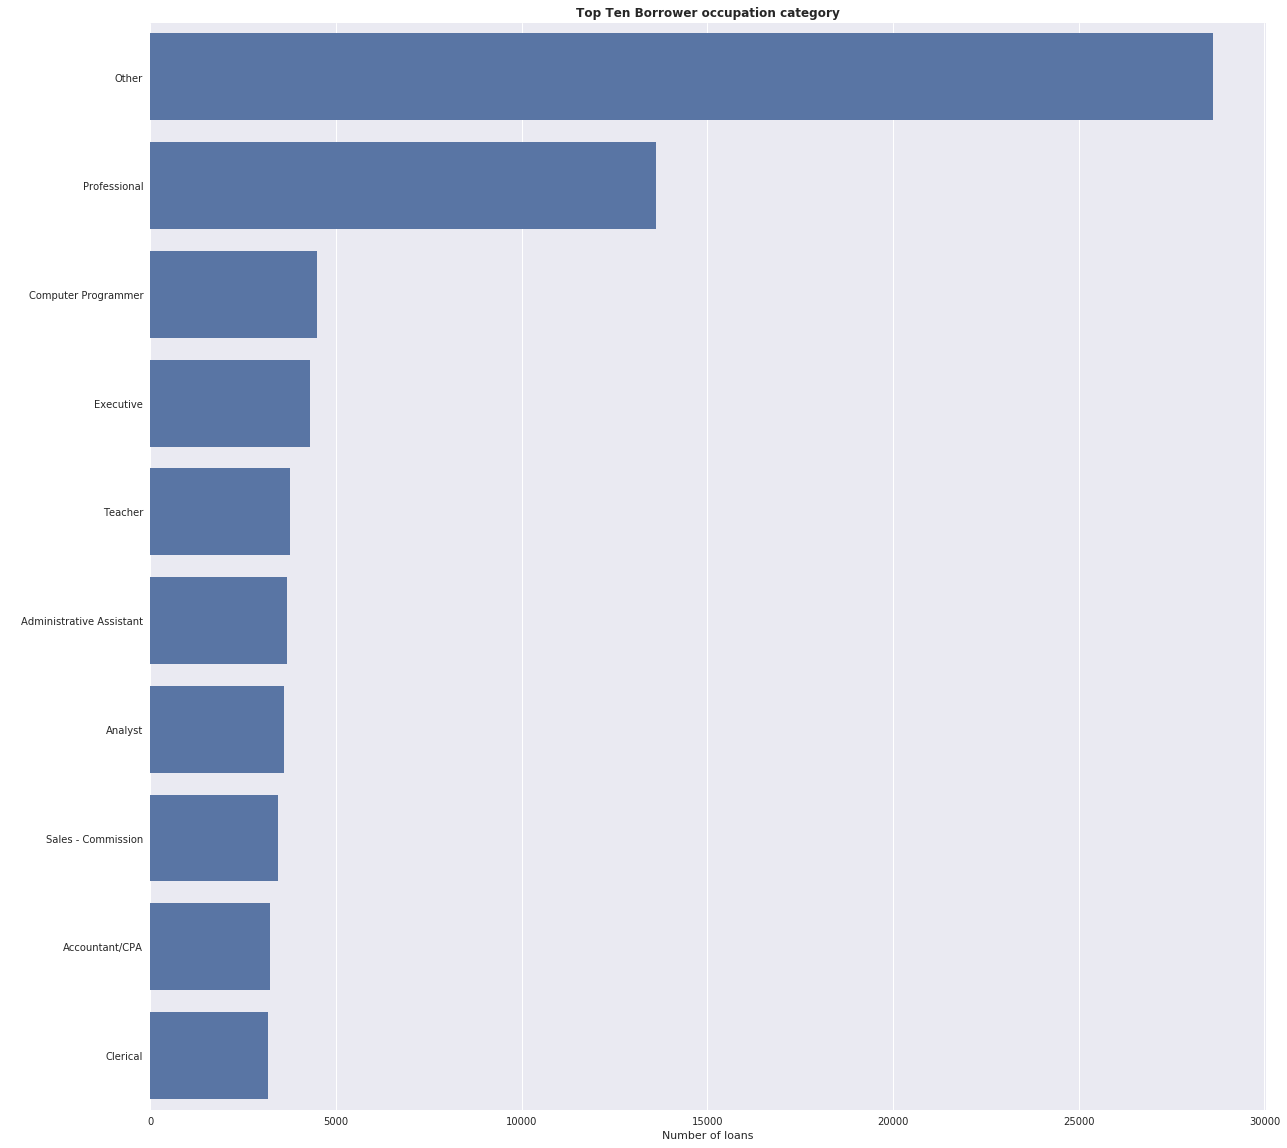

In [19]:
#Top 10 borrower's occupation categories
base_color = sns.color_palette()[0]   
freq = loan_data['Occupation'].value_counts().nlargest(10)
gen_order = freq.index
sns.countplot(data= loan_data, y='Occupation', color=base_color, order=gen_order);
# Labeling the x axes
sns.set(rc={'figure.figsize':(15,5)})
plt.ylabel(' ')
plt.xlabel('Number of loans')
plt.title("Top Ten Borrower occupation category",fontweight="bold")

# Dsiplay the plot
plt.show()

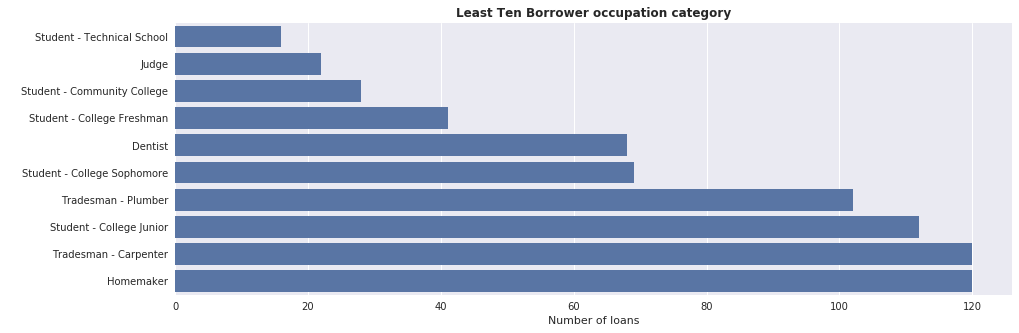

In [20]:
#least !0 borrower's occupation categories
base_color = sns.color_palette()[0]   
freq = loan_data['Occupation'].value_counts().nsmallest(10)
gen_order = freq.index
sns.countplot(data= loan_data, y='Occupation', color=base_color, order=gen_order);
sns.set(rc={'figure.figsize':(15,5)})
# Labeling the x axes
plt.ylabel(' ')
plt.xlabel('Number of loans')
plt.title("Least Ten Borrower occupation category",fontweight="bold")
# Dsiplay the plot
plt.show()

>from the Top 10 count plot the most number of loans were taken taken by borrowers who filled "others" in their occupation category. Proffesionals followed next with close to 1500 loans then computer programmers, excectutives , teachers, Administrative assistants. Interestingly the top 10 borrowers were mostly corporate workers.

>From the least 10 the least loans were taken by stidents of technical schools(about 20) followed by Judges, community college students, college freshmen, Dentists,sophomore students, plumbers, Junior college students and carpenters. This group was basically dominated by stidents of all categories which was quite logical.

Exploration of loan status column

In [21]:
#value counts
loan_data.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

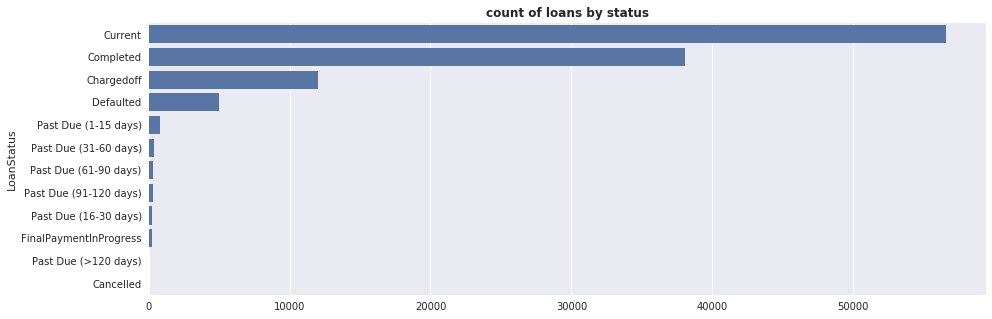

In [22]:
#count plot
base_color = sns.color_palette()[0]   
freq = loan_data['LoanStatus'].value_counts()
gen_order = freq.index
sns.countplot(data= loan_data, y='LoanStatus', color=base_color, order=gen_order);
sns.set(rc={'figure.figsize':(15,5)})
# Labeling the x axes
plt.title("count of loans by status",fontweight="bold")
plt.xlabel('number of loans')
plt.xlabel('')
# Display the plot
plt.show()

>From the loan status column it can be seen that most of the loans listed in timeframe of the dataset were currently being serviced then with about 38,000 loans completed, over !!,000 and 5,000 loans were charged off and defaulted respectively with the rest being overdue in varying date ranges save 5 loans that were cancelled

Exploration of the loan term column

In [23]:
#value counts
loan_data.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

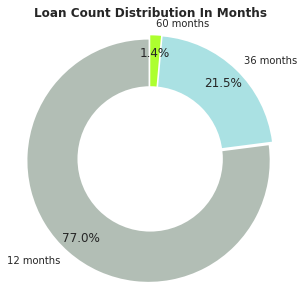

In [24]:
# Setting size in Chart based on value counts values
sorted_counts = loan_data.Term.value_counts()
# colors
colors = ['#B2BEB5','#AAE1E3','#ADFF2F']
# explosion
explode = (0.02,0.02, 0.02)

# Pie Chart
plt.pie(sorted_counts, colors=colors,labels=['12 months',"36 months",'60 months'],
        autopct='%1.1f%%', pctdistance=0.85,explode=explode, startangle = 90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Loan Count Distribution In Months',fontweight="bold")
plt.axis('square'); 
# Displaying Chart
plt.show()


>The pie chart indicates that a very heavy fraction of the loans were listed with a Term of 36 months(77%)  while those listed with a  Term of  60 months accounted for about 21% of the listings. Twelve month loans to a very tiny fraction of the total listings with about 1.4%.

Exploration of the borrower APR column

In [25]:
#column descrciption
loan_data['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

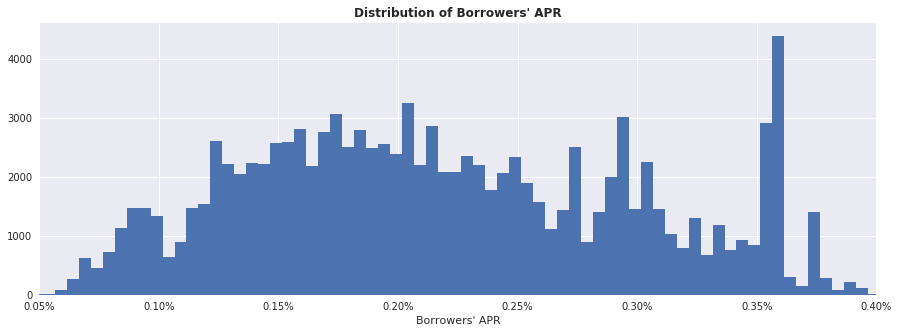

In [65]:
#borrowers' APR
binsize = 0.005
plt.xlim([0.05,0.4])
plt.title("Distribution of Borrowers' APR", fontweight="bold")
bins = np.arange(loan_data['BorrowerAPR'].min(), loan_data['BorrowerAPR'].max()+ 0.005, 0.005)
hist=sns.distplot(loan_data['BorrowerAPR'].dropna(),bins=bins, kde=False,hist_kws = {'alpha' : 1});
plt.xticks([0.05,0.10,0.15,0.20,0.25,0.30,0.35, 0.40],
           ['0.05%',"0.10%",'0.15%','0.20%',"0.25%", "0.30%", "0.35%",'0.40%'])
hist.set_xlabel("Borrowers' APR");



>The borrowers APR has a normal distribution that is skewed to the right with a very sharp spike at around 0.36.

Exploring the Estimated returns column.


In [27]:
#column description
loan_data['EstimatedReturn'].describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

>the min value of the company's estimated returns is less than 0, we take a look at the loans with negative values.

In [28]:
#query to ascertain negative returns
neg_returns=loan_data.query('EstimatedReturn < 0')

In [29]:
#description
neg_returns.EstimatedReturn.describe()

count    195.000000
mean      -0.047971
std        0.042554
min       -0.182700
25%       -0.062650
50%       -0.035400
75%       -0.018650
max       -0.000600
Name: EstimatedReturn, dtype: float64

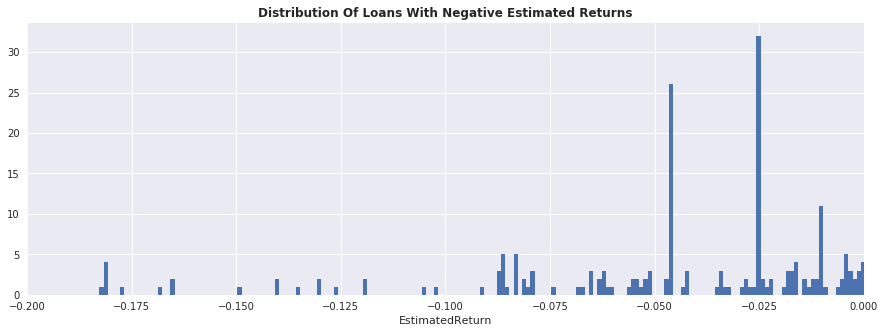

In [30]:
#plot 
binsize = 0.001
plt.xlim([-0.2,0])
plt.title('Distribution Of Loans With Negative Estimated Returns', fontweight="bold")
bins = np.arange(neg_returns['EstimatedReturn'].min(), loan_data['BorrowerAPR'].max()+ 0.001, 0.001)
sns.distplot(neg_returns['EstimatedReturn'],bins=bins, kde=False,hist_kws = {'alpha' : 1});

>since the loans with negative returns are just 195 it is normal that they are sparsly distributed between 0  and -0.2.

In [31]:
#query to get postive estimated returns
pos_returns=loan_data.query('EstimatedReturn >= 0')

In [32]:
#description
pos_returns.EstimatedReturn.describe()

count    84658.000000
mean         0.096400
std          0.029571
min          0.000000
25%          0.074630
50%          0.092110
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

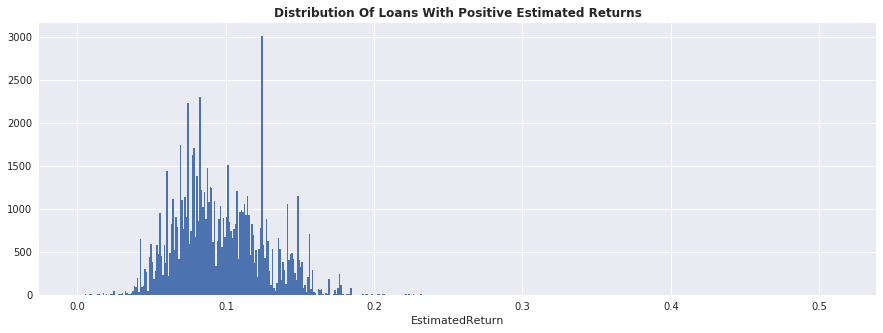

In [33]:
#plot 
binsize = 0.001
bins = np.arange(pos_returns['EstimatedReturn'].min(), loan_data['BorrowerAPR'].max()+ 0.001, 0.001)
plt.title('Distribution Of Loans With Positive Estimated Returns', fontweight="bold")
sns.distplot(pos_returns['EstimatedReturn'],bins=bins, kde=False,hist_kws = {'alpha' : 1});


>Explore further with an x limit of 0 - 0.2

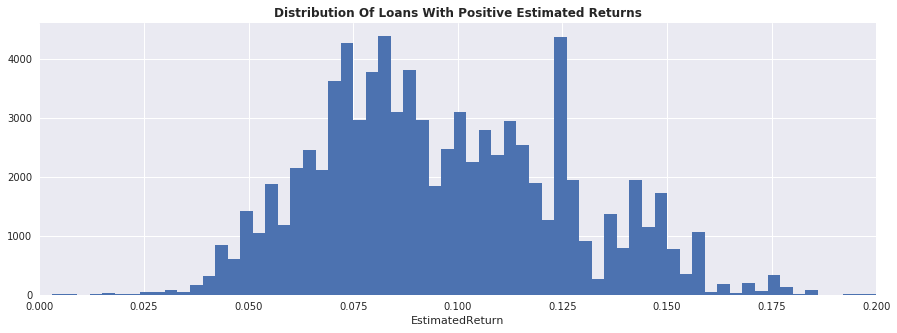

In [34]:
#plot
binsize = 0.003
plt.xlim([0,0.2])
bins = np.arange(pos_returns['EstimatedReturn'].min(), loan_data['BorrowerAPR'].max()+ 0.003, 0.003)
plt.title('Distribution Of Loans With Positive Estimated Returns', fontweight="bold")
sns.distplot(pos_returns['EstimatedReturn'],bins=bins, kde=False,hist_kws = {'alpha' : 1});


>As expected >99% of the total loans the company gave out had positive Estimated returns with only 195 loans Estimated to have negative returns.

>Since the  loans with negative returns were just 195 they were sparsly distributed between 0  and -0.2.

>The Distribution of loans with positive Estimated Returns was unimodal and skewed to the right with a significant spike at 0.123%.

Exploring the Stated monthly income of borrowers

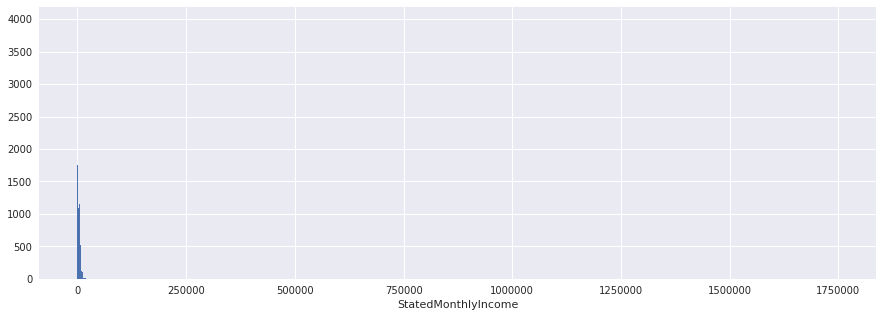

In [35]:
#creating a hist of the stated monthly income
binsize = 100
bins = np.arange(loan_data['StatedMonthlyIncome'].min(), loan_data['StatedMonthlyIncome'].max()+ 100, 100)
sns.distplot(loan_data['StatedMonthlyIncome'], bins=bins, kde=False,hist_kws = {'alpha' : 1});


>it can be observed that the distribution is tremendously skewed to the right.

Zooming into the distribution within the limits of the spike above just for confirmstion


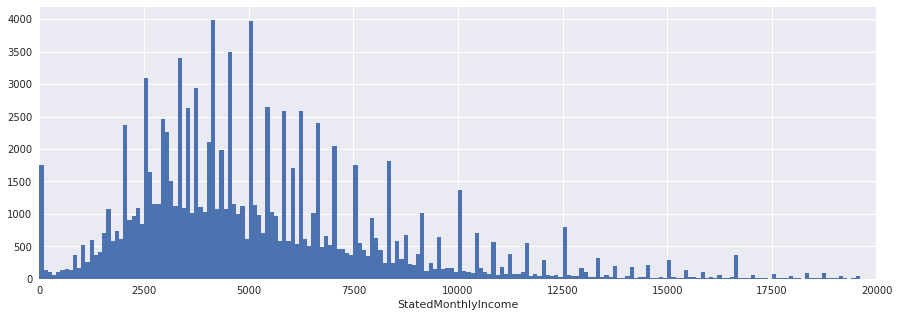

In [36]:
binsize = 100
plt.xlim([0, 20000])
bins = np.arange(loan_data['StatedMonthlyIncome'].min(), loan_data['StatedMonthlyIncome'].max()+ 100, 100)
sns.distplot(loan_data['StatedMonthlyIncome'], bins=bins, kde=False,hist_kws = {'alpha' : 1});


checking the skewness and kurtosis

In [37]:
loan_data['StatedMonthlyIncome'].agg(['skew', 'kurtosis']).transpose()

skew          125.009774
kurtosis    26823.376154
Name: StatedMonthlyIncome, dtype: float64

>the distribution has a very high kurtosis confirming the tremendous skewness seen earlier

>since the column contain zero values we proceed to perform a log(x+1) transformation

In [38]:
#Add one to the values to remove the zero values
loan_data['StatedMonthlyIncome']= loan_data['StatedMonthlyIncome'] + 1
#store the series in a variable
x1=loan_data['StatedMonthlyIncome']

In [39]:
#find the log of x1
logx1=np.log10(x1)

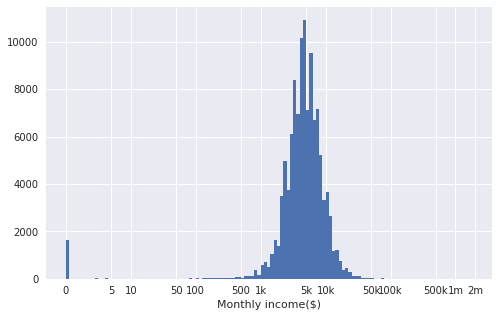

In [40]:
log_binsize = 0.05
bins =np.arange(logx1.min(),logx1.max()+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(logx1 ,bins=bins)
plt.xticks([np.log10(1),np.log10(5),np.log10(10),np.log10(50),
            np.log10(100),np.log10(500),np.log10(1000), 
            np.log10(5000), np.log10(10000),
            np.log10(50000), np.log10(100000),
            np.log10(500000), np.log10(1000000), np.log10(2000000)],
           ['0',"5",'10','50',"100", "500", "1k",'5k', 
            '10k', '50k','100k','500k','1m','2m'])
plt.xlabel('Monthly income($)')
plt.show()

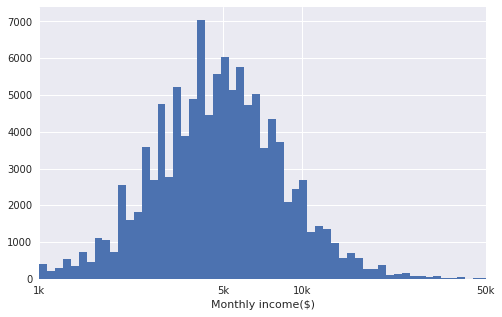

In [41]:
log_binsize = 0.03
bins =np.arange(logx1.min(),logx1.max()+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.xlim([np.log10(1000),np.log10(50000)])
plt.hist(logx1 ,bins=bins)
plt.xticks([np.log10(1000), np.log10(5000),
            np.log10(10000),np.log10(50000)],
           [ "1k",'5k', '10k', '50k'])
plt.xlabel('Monthly income($)');

>the first histogram. with a linear transformation of the amount shows  a very spiky distribution with a very long tail to the left showing that most of the stated monthly incomes of the borrowers were mostly condensed around the lower values.
After the Log(x+1) transformation it was the discovered the borroweres Stated incomes was peaked around 500 dollars with a significant spike at 0 dolllars to show that a significant number of borrowers stated 0 dollars month;y income.

Exploring the Listing Category column

In [42]:
#value counts
loan_data['ListingCategory (numeric)'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64

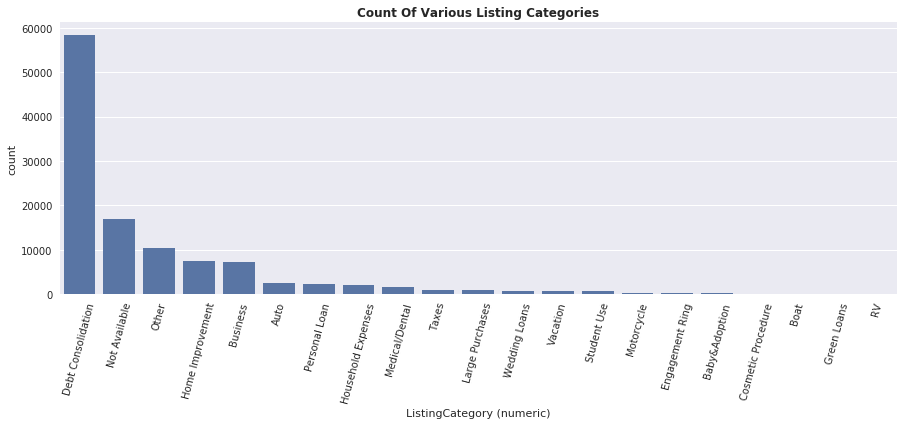

In [43]:
#value count series to give a countdown
freq = loan_data['ListingCategory (numeric)'].value_counts()
# Get the indexes of the Series
gen_order = freq.index
plt.title('Count Of Various Listing Categories',fontweight="bold")
plt.xticks(rotation=75)
# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=loan_data,  x='ListingCategory (numeric)', color=base_color, order=gen_order);
 

 >from the bar graph it can be deduced that a very large fraction of the loans (close to 60,000) were obtained for debt consolidation i.e to service other loans, with about 18,000 and 10,000 loans were ctegorized as 'not available' and "others' respectively. A little over 8000 loans were cobtained for home improvement and business ventures each. Then expenses like Household Expenses, Medical/Dental, Taxes, Large Purchases, Wedding Loans, Vacation, Student Use,
Motorcycle, Engagement Ring, Baby&Adoption, Cosmetic Procedure, Boat,  and Green Loans  each had less than 2,000 listings.     

Exploring the loan amount column

In [44]:
#column description
loan_data['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

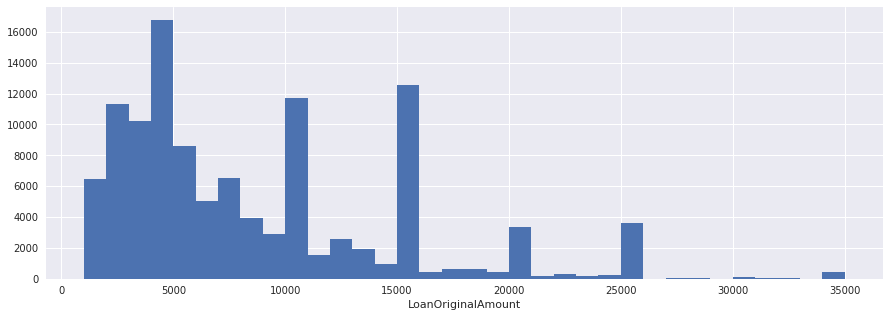

In [45]:
#plottiing the loan amount.
binsize = 1000
bins = np.arange(loan_data['LoanOriginalAmount'].min(), loan_data['LoanOriginalAmount'].max()+ 1000, 1000)
sns.distplot(loan_data['LoanOriginalAmount'], bins=bins, kde=False,hist_kws = {'alpha' : 1});


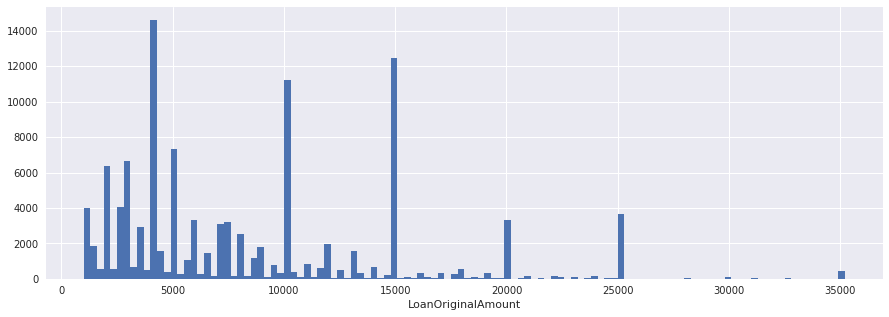

In [46]:
#investigating further on a smaller bin size
binsize = 300
bins = np.arange(loan_data['LoanOriginalAmount'].min(), loan_data['LoanOriginalAmount'].max()+ 300,300)
sns.distplot(loan_data['LoanOriginalAmount'], bins=bins, kde=False,hist_kws = {'alpha' : 1});

>from The plot above it can be observed that are very sharp spike at successive multi thousand dollar round figures with trails in between. These trails has a peak around the 5,000 Dolloar mark which is suggestive that most loans were given out in multi thousand Dollar round figures.

#### Univariate Exploration Summary

> The employment status distribution showed that a huge portion of the loans were taken by individuals who were just employed or employed full time or part-time. **A very tiny portion of the loans were taken by unemployed and retired persons.** People with occupations designated as Proffesionals topped the list of loan takers with about  1,500 loans then computer programmers, excectutives , teachers, Administrative assistants follwed respectively. **Interestingly the top 10 borrowers were mostly corporate workers.** The least loan taker category by occupation were stidents of technical schools(about 20) followed by Judges, community college students, college freshmen, Dentists,sophomore students, plumbers, Junior college students and carpenters respectively. **The least loan takers were students at different levels which was quite logical.**

>**Most of the loans listed in the timeframe of the dataset were currently being serviced then with about 38,000 loans already completed,** over !!,000 and 5,000 loans were charged off and defaulted respectively with the rest being overdue in varying date ranges save 5 loans that were cancelled. **A heavy fraction of the loans were listed with a Term of 36 months(77%)** while those listed with   Terms of  24 months accounted for about 21% of the listings. Twelve month loans to a very tiny fraction of the total listings with about 1.4%. Over 99% of the total loans the company gave out had positive Estimated returns with only 195 loans Estimated to have negative returns (195 in number they were sparsly distributed between 0  and -0.2%.). **The borrowers APR has a normal distribution that is skewed to the right with a very sharp spike at around 0.36.**

> Furthermore, **a very large fraction of the loans (close to 60,000) were obtained for debt consolidation i.e to service other loans,** with about 18,000 and 10,000 loans were ctegorized as 'not available' and "others' respectively. A little over 8000 loans were cobtained for home improvement and business ventures collectively. Then expenses like Household Expenses, Medical/Dental, Taxes, Large Purchases, Wedding Loans, Vacation, Student Use, Motorcycle, Engagement Ring, Baby&Adoption, Cosmetic Procedure, Boat,  and Green Loans  each had less than 2,000 listings.   

****

>The first histogram of the Stated monthly income of the borrowers with on a linear transformation showed a very spiky distribution with a very long tail to the left(skewness of 125.009774 and  kurtosis of 26823.376154)  showing that most of the stated monthly incomes of the borrowers were mostly condensed around the lower values. Then a  Log(x+1) transformation was performed because it had 0 values. The transformed histogram showed that the distribution was peaked around 5,000 dollars with a significant spike at 0 dolllars **to show that a significant number of borrowers stated 0USD as their monthly income.** The loan amounts  distribution had peaks at successive multi thousand dollar round figures with trails in between. The peak of these spikes was around the 5,000 Dollar mark **which is suggestive that most loans were given out in multi thousand Dollar round figures.**

## Bivariate Exploration

 **General Pair wise correlations**

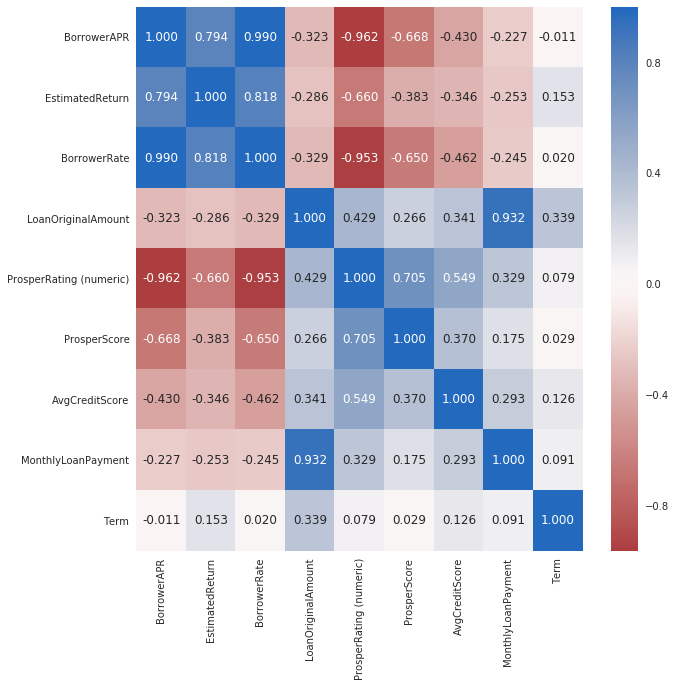

In [47]:
vars = ['BorrowerAPR','EstimatedReturn','BorrowerRate',
        'LoanOriginalAmount', 'ProsperRating (numeric)','ProsperScore',
        'AvgCreditScore','MonthlyLoanPayment' ,"Term"]
 # correlation plot
plt.figure(figsize = [10, 10])
sns.heatmap(loan_data [vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

>As expected the borrowers APR and Estimated Yield were
strongly postively correlated indicating that loans with higher annnual payments consequentially had higher Estimated yields. 

>The APR then showed a fair negative correlation with Loan amount suggesting that hihger loans were oftentimes 
associated with lesser annual percentage rates.

>Furthermore, the risk factors( prosper Ratings and prosper score) were  both fairly positively correlated but were strongly negatively
correlated with the borrower's APR indicating that high risk borrowers(with lower prosper ratings and prosper scores) were often tasked with higher APRs.

>Also, the loan amount can also be said to be fairly positively correlated to the risk factors (prosper Ratings and prosper score) indicating that less riskier borrowers were often associated with higher loan amounts.

>The loan amount also had a very strong correlation with monthly payment since it is intuitive that higher loan amounts be associated
with higher monthly payments.

>Finally, the correlation coefficient between the loan Term and almost all other variables in the subset analyzed were are very weak except for the loan amount. this amounts to the fact that loan terms were mostly not related to the risk factors or estimated yield or APR but just slightly postively dependent on the loan amount.


 

**Exploring Positive and Negative estimated return vs Risk profile( prosper rating numeric and Average credit score) of borrowers**

1. Compare prosper rating vs Postive and Negative Estimated Return Value loans

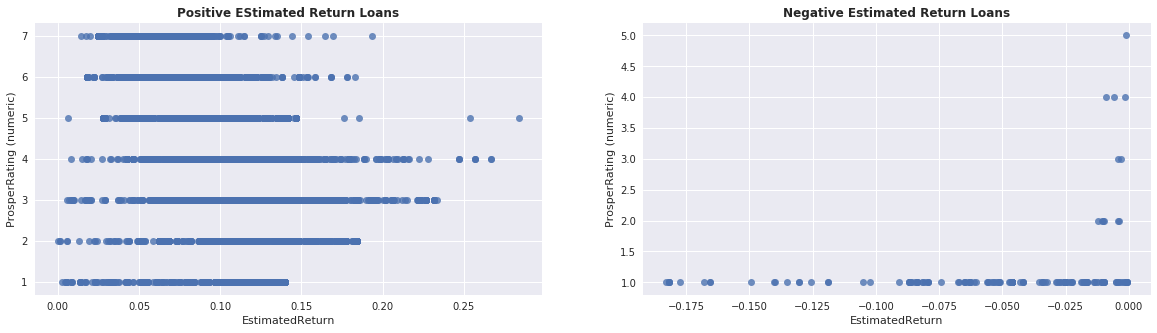

In [48]:
#make two scatter plots side by side
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - Positive Estimated Return Loans
plt.subplot(1, 2, 1)
plt.title("Positive EStimated Return Loans", fontweight="bold")
sns.regplot(data = pos_returns, y = 'ProsperRating (numeric)', x = 'EstimatedReturn',fit_reg=False );
# PLOT ON RIGHT - Negative Estimated return Loans
plt.subplot(1, 2, 2)
plt.title("Negative Estimated Return Loans", fontweight="bold")
sns.regplot(data = neg_returns, y = 'ProsperRating (numeric)', x = 'EstimatedReturn', fit_reg=False);

 

>The patterns shown by these two Estimated Returns categories were quite interesing, first loans with Positive Estimated returns the data points were fairly evenly spread across all the prospee rating values upto 7. This translates to the fact that these loans were often associated of low risk borrowers as well as high risk borrowers. While for loans with negative Estimated returns almost all the data points were on the prosper rating of 1. This clearly shows that Loans that were Estimated to have negative returns were always associated with very high risk borrowers.

**Exploring the relationship between  Borrower APR and  other variables of interest**

1. Borrowers APR vs Estimated return

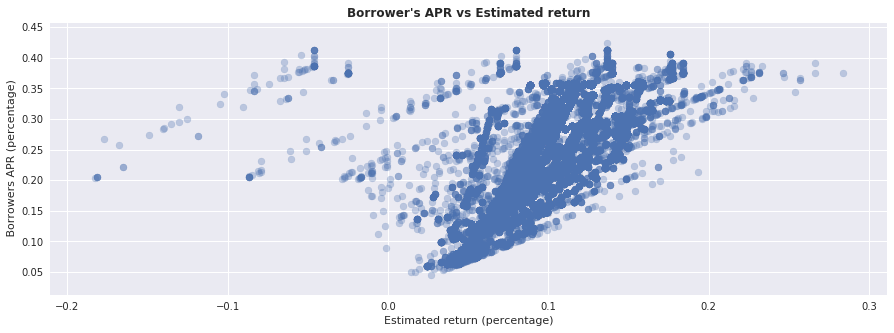

In [49]:
#scatter plot of loan Estimated return vs borrower APR
plt.scatter(data = loan_data, x = 'EstimatedReturn', y = 'BorrowerAPR',alpha = 3/10);
plt.xlabel('Estimated return (percentage)');
plt.ylabel(' Borrowers APR (percentage)');
plt.title("Borrower's APR vs Estimated return", fontweight="bold");


>The relationship between the percentage APR and Estimated return in  percentage can be said to be fairly positively correlated. This means that loans with high Total annual payments were estimated to yield more returns.


2. Borrower APR vs Loan Amount

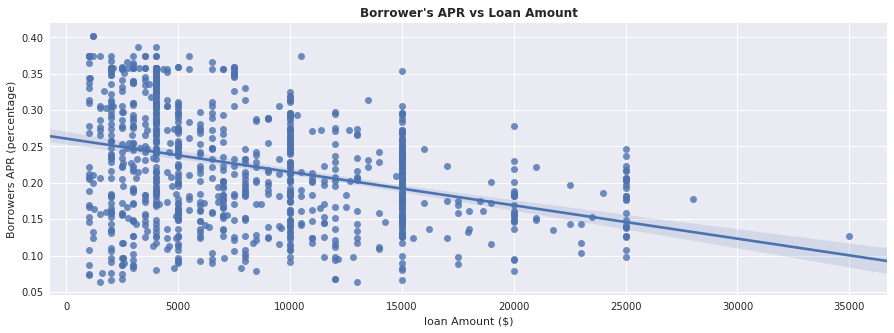

In [50]:
#take 1000 samples and plot
samp=loan_data.sample(1000 )
sns.regplot(data = samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR');
plt.xlabel('loan Amount ($)');
plt.title("Borrower's APR vs Loan Amount", fontweight="bold")
plt.ylabel('Borrowers APR (percentage)');


>This shows a weak although significant negative correlation between the Loan amount and the percentage annual payback. It means that higer loans were most of the time associated with less APRS.

**Exploring loan amount and some Variables of interest**

1. loan amount vs prosper score

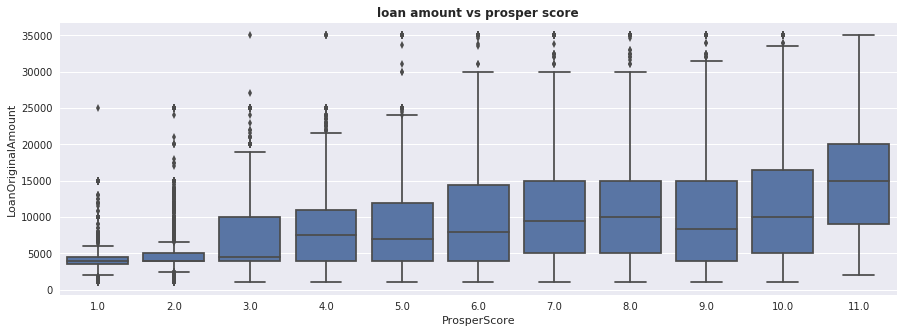

In [51]:
#box plot
sns.boxplot(data=loan_data, x='ProsperScore', y="LoanOriginalAmount", color=sns.color_palette()[0]);
plt.title("loan amount vs prosper score", fontweight="bold");
 

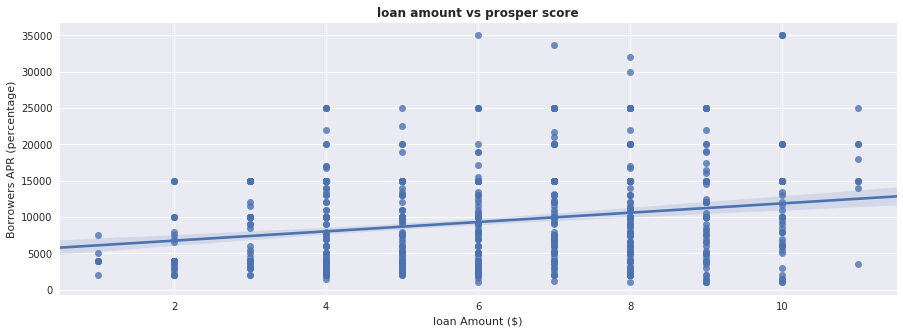

In [52]:
#make a reg plot with 1000 samples to check for correlation
samp=loan_data.sample(1000 )
sns.regplot(data = samp, x = 'ProsperScore', y = 'LoanOriginalAmount');
plt.title("loan amount vs prosper score", fontweight="bold");
plt.xlabel('loan Amount ($)');
plt.ylabel('Borrowers APR (percentage)');


>The box plot shows that a progressive icrease in all quantiles as the prosper score increases. It be seen that more loan sums were allocated to low  riskborrowers (borrowers with higher prosper scores) compared to high risk borrrowers which is rather intuitive.
> From the regression plot it can be also seen that there is a strong positive correlation between loan amount and the borrower's APR indicating that high risk borrowers( borrowera with hogh prosper scores) were often associated with higher amount in loans.

2. loan amount vs the various loan  status categories.


In [53]:
#summary table of the SUM of loan amount by loan status.
a=loan_data.groupby("LoanStatus")["LoanOriginalAmount"].sum().reset_index()
a['Percentage(%)'] = 100 * (a["LoanOriginalAmount"] / a['LoanOriginalAmount'].sum())
a= a.sort_values(by=['Percentage(%)'], ascending=False)
a

,LoanStatus,LoanOriginalAmount,Percentage(%)
3,Current,586174602,61.709453
2,Completed,235643536,24.807342
1,Chargedoff,76735809,8.078352
4,Defaulted,32550755,3.426776
6,Past Due (1-15 days),6825567,0.718561
8,Past Due (31-60 days),3097964,0.326138
10,Past Due (91-120 days),2433209,0.256156
9,Past Due (61-90 days),2419496,0.254712
7,Past Due (16-30 days),2161454,0.227547
5,FinalPaymentInProgress,1710955,0.180121


In [54]:
#summary table of the COUNT of loan amount by loan status.
a=loan_data.groupby("LoanStatus")["LoanOriginalAmount"].count().reset_index()
a['Percentage(%)'] = 100 * (a["LoanOriginalAmount"] / a['LoanOriginalAmount'].sum())
a= a.sort_values(by=['Percentage(%)'], ascending=False)
a

,LoanStatus,LoanOriginalAmount,Percentage(%)
3,Current,56576,49.655511
2,Completed,38074,33.416713
1,Chargedoff,11992,10.525115
4,Defaulted,5018,4.404188
6,Past Due (1-15 days),806,0.707408
8,Past Due (31-60 days),363,0.318597
9,Past Due (61-90 days),313,0.274713
10,Past Due (91-120 days),304,0.266814
7,Past Due (16-30 days),265,0.232585
5,FinalPaymentInProgress,205,0.179924


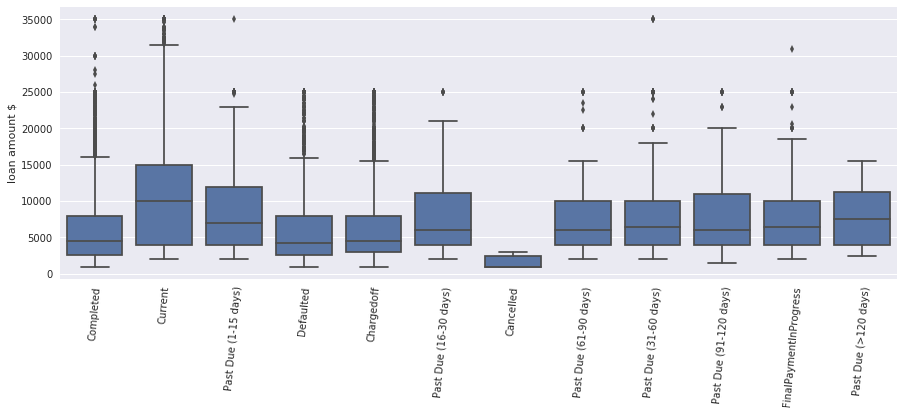

In [55]:
#box plot of the various loan status and their corresponding Loan amounts
sns.boxplot(data= loan_data, x='LoanStatus', y='LoanOriginalAmount', color=sns.color_palette()[0])
plt.xticks(rotation=85);
plt.xlabel("");
plt.ylabel("loan amount $");

>completed loans had a much lower median(about 5,000) and a much more higer distribution above that median with many outliers, while current loans had a higer median value of about 1000 with longer 3rd quartile and maximum value interval and a few less otliers.

>the defaulted and charged off loans also had almost the same box distribution as completed loans except they had less outliers.

>Almost al the categories that are past due have identical box distributions except those greater than 120 days which had a slightly higher median value.

3. Loan amount vs loan Term

In [56]:
#summary table of the sum of loan amount by loan Term.
a=loan_data.groupby('Term')["LoanOriginalAmount"].sum().reset_index()
a['Percentage(%)'] = 100 * (a["LoanOriginalAmount"] / a['LoanOriginalAmount'].sum())
a= a.sort_values(by=['Percentage(%)'], ascending=False)
a

,Term,LoanOriginalAmount,Percentage(%)
1,36,638686342,67.237619
2,60,303631410,31.964756
0,12,7576595,0.797625


In [57]:
#summary table of the count of loan amount by loan Term.
a=loan_data.groupby("Term")["LoanOriginalAmount"].count().reset_index()
a['Percentage(%)'] = 100 * (a["LoanOriginalAmount"] / a['LoanOriginalAmount'].sum())
a= a.sort_values(by=['Percentage(%)'], ascending=False)
a

,Term,LoanOriginalAmount,Percentage(%)
1,36,87778,77.040821
2,60,24545,21.542607
0,12,1614,1.416572


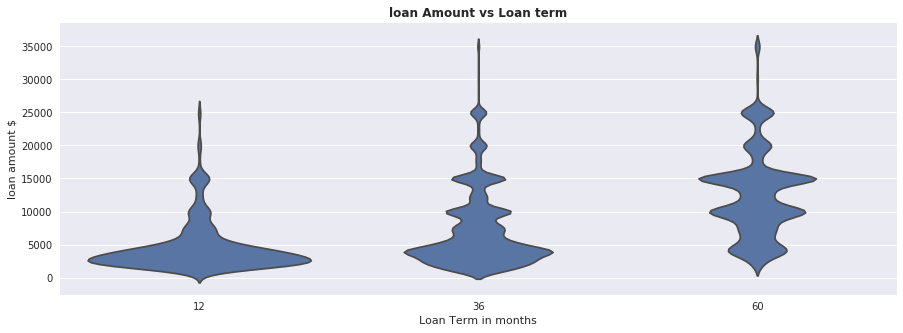

In [58]:
sns.violinplot(data=loan_data, x='Term', y='LoanOriginalAmount', color=base_color, inner=None)
#this is the best angle for positionong x-ticks
plt.title('loan Amount vs Loan term', fontweight="bold")
plt.xlabel("Loan Term in months");
plt.ylabel("loan amount $");
 

The violin plot shows an interesting but rather expected pattern in loan amounts according to their terms.
>short term loans(12 months) were most often clustered under 5,000 dolllars which was quite logical, mid term loans(24 months) were almost clustered in the same manner but with less width and were a bit drawn up to the max loan amount. Long term loans were then observed to have its two widths above 10,000 dollars suggesting that higher amounts were often associated with longer payment terms.


>There seem to be a upward movement trend in average credit score as the prosper rating increases suggesting that borrowers who had very high credit scores were often classified as less risky borrowers according to the prosper ratings.

4. Mean Loan amounts vs employment status

In [59]:
#summary table of the mean loan amounts by employment status.
a=loan_data.groupby("EmploymentStatus")["LoanOriginalAmount"].mean().reset_index()
a['Percentage(%)'] = 100 * (a["LoanOriginalAmount"] / a['LoanOriginalAmount'].sum())
a= a.sort_values(by=['Percentage(%)'], ascending=False)
a


,EmploymentStatus,LoanOriginalAmount,Percentage(%)
0,Employed,9794.017988,19.552266
7,Self-employed,8122.836485,16.216006
4,Other,6861.727010,13.698393
1,Full-time,6194.779017,12.366933
2,Not available,5372.534879,10.725448
3,Not employed,4872.659880,9.727524
6,Retired,4784.145912,9.550819
5,Part-time,4088.772059,8.162611


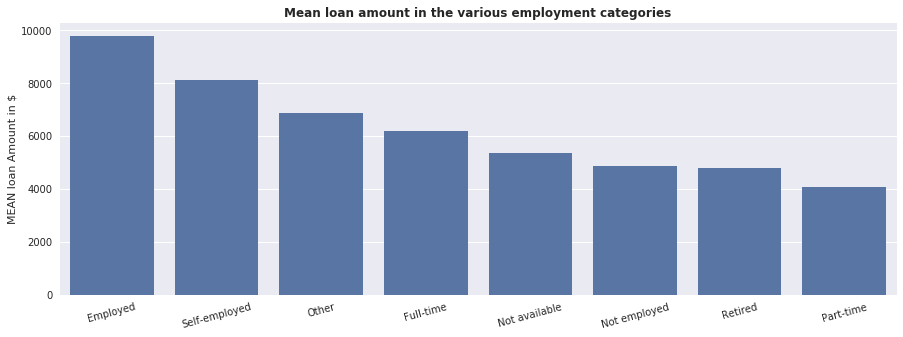

In [60]:
base_color = sns.color_palette()[0]
sns.barplot(data=a, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color);
plt.xticks(rotation=15);
plt.title("Mean loan amount in the various employment categories", fontweight="bold")
plt.ylabel('MEAN loan Amount in $');
plt.xlabel('');

>It is quite interesting to note that borrowers who were employed averagely had the highest amounts of loans, the average amount of loan taken by unemployed and retired borrowers was almost the same and was about 5,000USD.

**Average credit scores vs prosper rating**

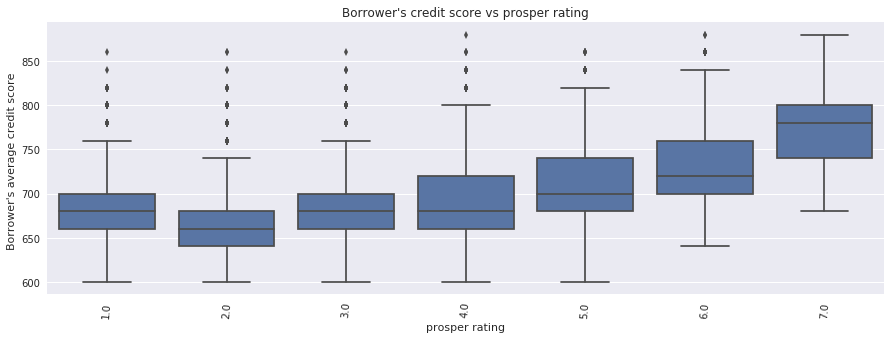

In [61]:
#box plot of borrower's average credit scores and prosper ratings
sns.boxplot(data= loan_data, x='ProsperRating (numeric)', y='AvgCreditScore', color=sns.color_palette()[0])
plt.xticks(rotation=85);
plt.title("Borrower's credit score vs prosper rating")
plt.xlabel("prosper rating");
plt.ylabel("Borrower's average credit score ");

### Bivariate Exploration summary
>The Estimated Returns were  first categorized as positive and negative. The Positive Estimated returns loans were very inclusive of low risk borrowers as well as high risk borrowers while the Negative return loans were always associated with very high risk borrowers.

>  APR  seems to be a highly dependent variable because it had relatively high correlation with most of the variables of interest. It was strongly postively correlated with Estimated Yield indicating that loans with higher annnual payments consequentially had higher Estimated yields it also showed a fair negative correlation with Loan amount suggesting that hihger loans were oftentimes given lesser annual payment rates.
>Furthermore,the borrower's APR was strongly negatively correlated with  the risk factors( prosper Ratings and prosper score) indicating that high risk borrowers were often tasked with higher APRs.

>The loan amount was discovered to be fairly positively correlated to the risk factors (prosper Ratings and prosper score) indicating that less riskier borrowers were often associated with higher loan amounts it also had a very strong correlation with monthly payment since it is intuitive that higher loan amounts be associated
with higher monthly payments. It was also that borrowers who were employed averagely had the highest amounts of loans, the average amount of loan taken by unemployed and retired borrowers was almost the same and was about 5,000USD.

>Finally, the correlation coefficient between the loan Term and almost all other variables in the subset analyzed were are very weak except for the loan amount. This amounts to the fact that loan terms were mostly not related to the risk factors or estimated yield or APR but just slightly postively dependent on the loan amount.

 

****
>There seem to be a upward movement trend in average credit score as the prosper rating increases suggesting that borrowers who had very high credit scores were often classified as less risky borrowers according to the prosper ratings.

>Only about 33% of all the listings had been successfully Completed, 49% were still running with about 0.2% in the final payment stage. The rest were classified as either defaulted, past due or charged off.
>About 61% of the loans which amounted to 586,174,602USD were still running with 0.2% (1,710,955USD) of the loan amount also in the final payment phase. 25%(235,643,536USD) had been completed while the rest amounting to	123,804,758 were either classified as charged off, Defaulted, past due or cancelled.



 

## Multivariate Exploration

**Estimated Return vs Borrower Return color coded by prosper score.**

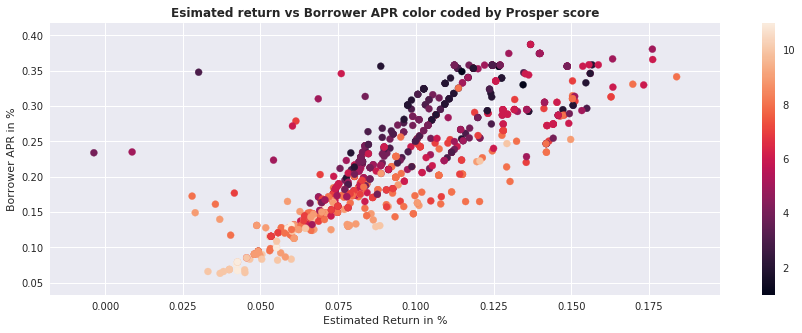

In [62]:
d=loan_data.sample(1000)
plt.scatter(data =d, x = 'EstimatedReturn', y = 'BorrowerAPR', c = 'ProsperScore');
plt.title("Esimated return vs Borrower APR color coded by Prosper score", fontweight="bold")
plt.xlabel("Estimated Return in %")
plt.ylabel("Borrower APR in %")
plt.colorbar();

From the scatter plot above it can be observed that there is a positive correlation between Borrower's APR and Estimated return indicating that loans with high estimated returns mostly had high annual payments. Also, the color coding of the prosper score  of this sample shows that most low risk borrowers were clustered in the lower points of the borrower APR.

**Facet Grid of Loan Amount vs Borrower APR by Loan Term and Employment Status.**

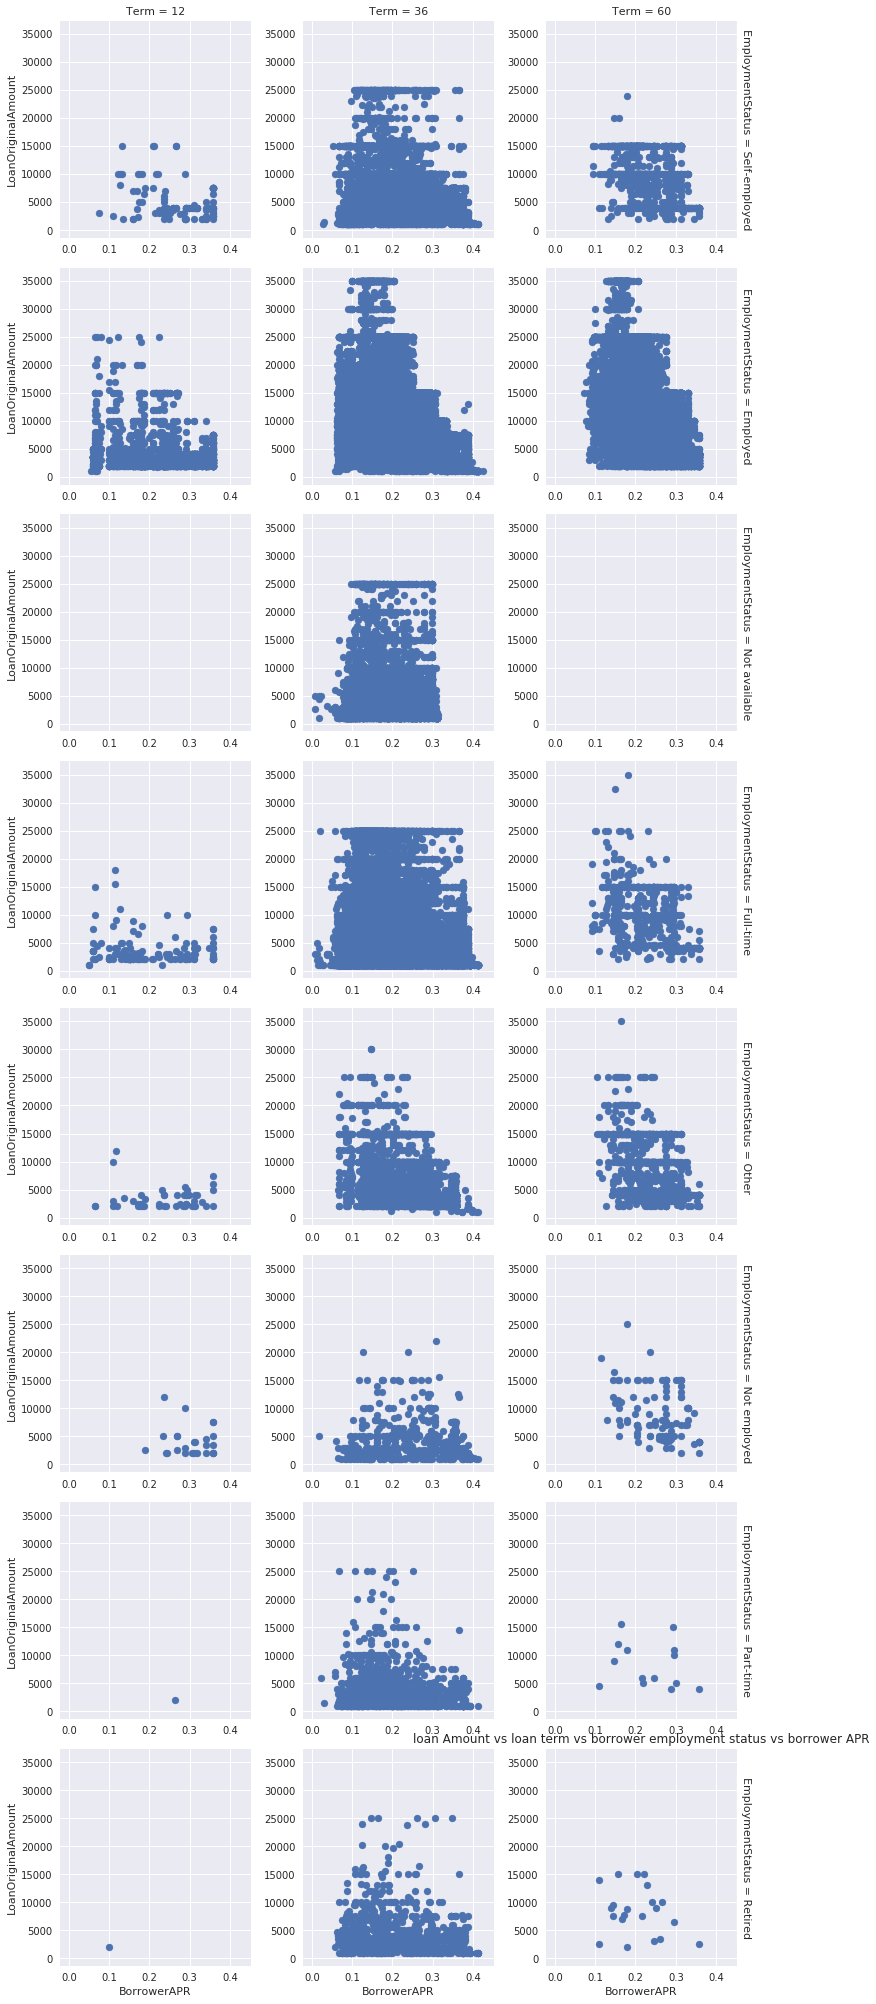

In [63]:
g = sns.FacetGrid(data = loan_data, col = 'Term', row = 'EmploymentStatus', size = 3.5,
                margin_titles = True);
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount');
plt.title("loan Amount vs loan term vs borrower employment status vs borrower APR");

>The overall loan pattern was that almost all the borrowers regardless of Employment status often times preferred taking longer term loans with most of the loans falling in the 36 month term category. Also, retired borrowers and part-time employed borrowers most often avoided the lower term loans (6 & 12 month terms) and when they sparingly did, the loan amounts were always below the median loan amount. 

>It was also observed that there was a maximum confinement of 36 months Term loans at around 25,000USD for retired borrowers, part-time workers, Unemployed borrowers and almost the rest  except borrowers in the Employed category who had dense points above that amount.

### Multivariate Exploration summary 
> There was a positive correlation between Borrower's APR and Estimated return indicating that loans with high estimated returns mostly had high annual payments. The  prosper score  of the sample analyzed showed that most low risk borrowers were clustered in the lower points of the borrower APR meaning that they were often associated with lower annual payments. Also there was a pattern that almost all borrowers regardless of Employment status often times preferred taking longer term loans with most of the loans falling in the 36 month term category.

> furthermore, retired borrowers and part-time employed borrowers strongly avoided the lower term loans (6 & 12 month terms) and when they sparingly did, the loan amounts were always below the median loan amount. 

***
>Most interestingly, it  was also observed that there was a maximum confinement of 36 months Term loans at around 25,000USD for retired borrowers, part-time workers, Unemployed borrowers and almost the rest  except borrowers in the Employed category who had dense points above that amount. **This translates to the fact that most often only borrower's with employment status designated as "employed" were given loans above 25,000 USD.**

## Conclusions


* Most of the loans listed in the timeframe were currently being serviced then with about 38,000 loans already completed with 77% of them listed on 36 month Terms.
* A very large fraction of the loans (close to 60,000) were obtained for debt consolidation and most of the loans were given out in multi thousand Dollar round figures.
* The average borrowers APR(Total annual  to be payed by borrowers in percentage) had a normal distribution that is skewed to the right with a mode at around 0.36%.
* The top 10 borrowers were mostly corporate workers while least loan takers were students at different levels.
* The average ststed income for the borrowers was about 5,000 dollars with a significant number of borrowers stating 0USD as their monthly income.
* loans with Positive Estimated returns loans were very inclusive of low risk borrowers as well as high risk borrowers while the Negative return loans were always associated with very high risk borrowers.
* Loans given out in higer amounts were oftentimes assigned lower annual payment rates.
* High risk borrowers were often tasked with higher APRs.
* Loan terms were mostly not related to the risk factors, Estimated yield or APR but just slightly postively dependent on the loan amount.
* Almost all borrowers regardless of Employment status often times preferred taking longer term loans with most of the loans falling in the 36 month term category. Retired borrowers and part-time employed borrowers also had a very stong affinity for 60 months loans.


 
 
  